<a href="https://colab.research.google.com/github/salmanromeo/ECEN_5513_Stochastic_Systems/blob/main/Joint_Marginal_Conditional_Probabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem**

#####A pair of random variables $(X,Y)$ are uniformly distributed over the unit circle. That is, the joint PDF is
\begin{align}
        f_{X,Y}(x,y) = \left\{
        \begin{array}{cl}
        \frac{1}{\pi} & x^2+y^2 \lt 1 \\
        0 & otherwise.
        \end{array}
        \right.
    \end{align}
#####Use MATLAB or Python to generate a large number of samples of this pair of random variables.
#####Submit the code and the following figures:
#####Figure 1. $2D$-histogram of samples $(x,y)$ and the analytical joint pdf; (hint: use MATLAB function 'histogram2')
#####Figure 2. $1D$-histogram of samples x and the analytical marginal pdf of $X$;
#####Figure 3. $1D$-histogram of samples x falling in the region $-0.01<y<0.01$, and the analytical conditional pdf of $X$ given $y=0$.


**Solution**

#####The marginal PDF of X can be found as follows:
\begin{align}
        f_{X}(x) = \int_{-\infty}^{\infty} f_{X,Y}(x,y) dy = \int_{-\sqrt{(1-x^2)}}^{\sqrt{(1-x^2)}} \frac{1}{\pi} dy = \frac{2}{\pi}{\sqrt{(1-x^2)}}
    \end{align}
#####Now, to find the conditional PDF of $X$ given $Y = 0$, we can use the definition of conditional probability:
\begin{align}
        f_{X,Y}(x | 0) = \frac{f_{X,Y}(x,0)}{f_{Y}(0)}
    \end{align}
#####First, let's calculate $f_{Y}(0)$, the marginal PDF of $Y$ at $y = 0$.
#####Given the symmetry of the joint distribution over the unit circle, we know that the probability density at any point $(x, y)$ is the same for all points with the same distance from the origin. So, $f_{Y}(0)$ should be the same as $f_{X}(0)$ since both $X$ and $Y$ have the same marginal PDF due to symmetry.
#####Therefore, $f_{Y}(0)$ $=$ $f_{X}(0)$.
#####Now,
\begin{align}
        f_{X}(0) = \frac{2}{\pi}{\sqrt{(1-0^2)}} = \frac{2}{\pi}
    \end{align}
#####So,
\begin{align}
        f_{X,Y}(x | 0) = \frac{f_{X,Y}(x,0)}{f_{Y}(0)} = \frac{f_{X,Y}(x,0)}{f_{X}(0)} = \frac{\frac{1}{\pi}}{\frac{2}{\pi}} = \frac{1}{2}
    \end{align}
#####Therefore, the analytical conditional PDF of $X$ given $Y = 0$ is $\frac{1}{2}$.

**Code**

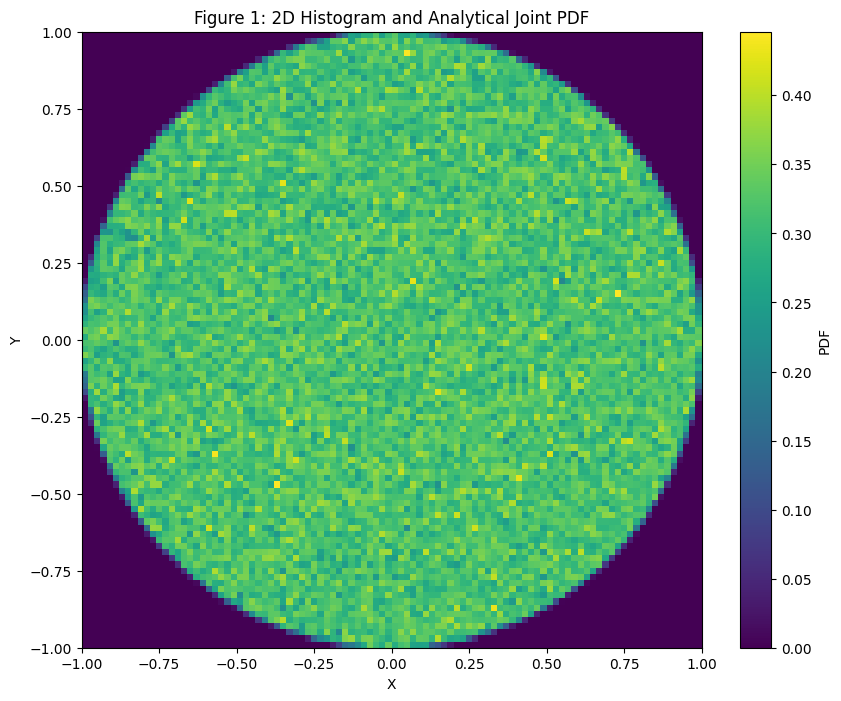

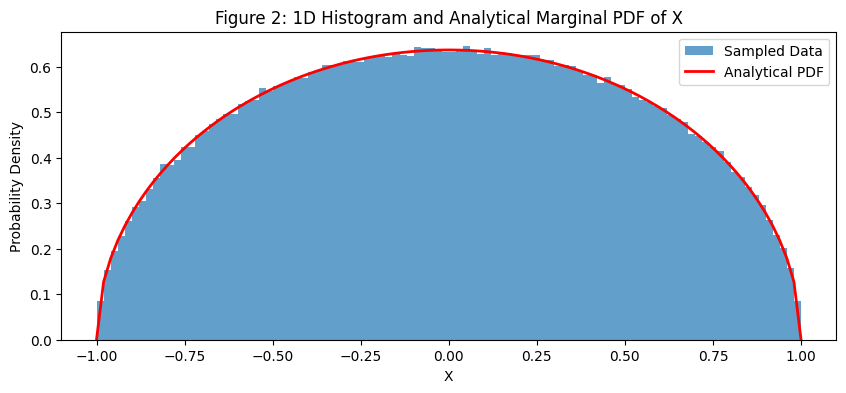

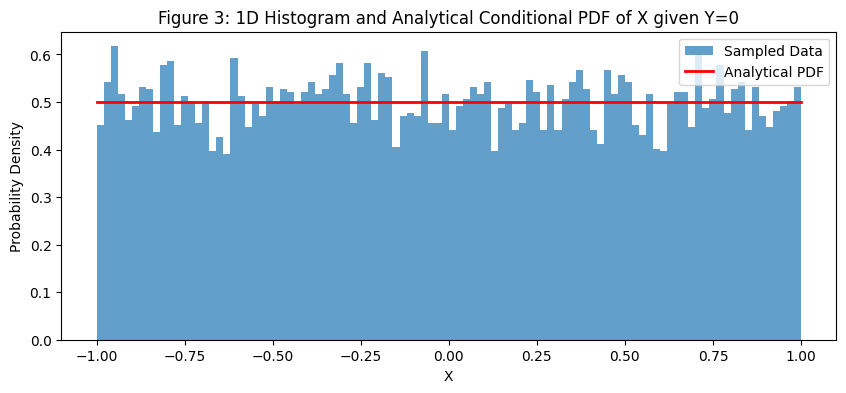

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
num_samples = 1000000

# Generate random samples for X and Y
np.random.seed(42)  # Set a random seed for reproducibility
x_samples = np.random.uniform(-1, 1, num_samples)
y_samples = np.random.uniform(-1, 1, num_samples)

# Filter samples within the unit circle
inside_circle = x_samples**2 + y_samples**2 < 1
x_samples = x_samples[inside_circle]
y_samples = y_samples[inside_circle]

# Analytical marginal PDF for X
def marginal_pdf_x(x):
    return (2 / np.pi) * np.sqrt(1 - x**2)

# Analytical conditional PDF for X given Y = 0
def conditional_pdf_x_given_y_zero(x):
    return 1/2

# Create Figure 1: 2D histogram of samples (x, y) and the analytical joint PDF
plt.figure(figsize=(10, 8))
plt.hist2d(x_samples, y_samples, bins=100, cmap='viridis', density=True)
plt.colorbar(label='PDF')
plt.title('Figure 1: 2D Histogram and Analytical Joint PDF')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Create Figure 2: 1D histogram of samples x and the analytical marginal PDF of X
plt.figure(figsize=(10, 4))
plt.hist(x_samples, bins=100, density=True, alpha=0.7, label='Sampled Data')
x_range = np.linspace(-1, 1, 100)
marginal_pdf_values = np.vectorize(marginal_pdf_x)(x_range)
plt.plot(x_range, marginal_pdf_values, color='red', linewidth=2, label='Analytical PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Figure 2: 1D Histogram and Analytical Marginal PDF of X')
plt.legend()
plt.show()

# Create Figure 3: 1D histogram of samples x in the region -0.01 < y < 0.01 and the analytical conditional PDF of X given y=0
plt.figure(figsize=(10, 4))
y_condition = (y_samples > -0.01) & (y_samples < 0.01)
x_conditioned = x_samples[y_condition]

plt.hist(x_conditioned, bins=100, density=True, alpha=0.7, label='Sampled Data')
x_range = np.linspace(-1, 1, 100)
conditional_pdf_values = np.vectorize(conditional_pdf_x_given_y_zero)(x_range)
plt.plot(x_range, conditional_pdf_values, color='red', linewidth=2, label='Analytical PDF')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.title('Figure 3: 1D Histogram and Analytical Conditional PDF of X given Y=0')
plt.legend()
plt.show()